<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/04-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4: Data Wrangling

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”.

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

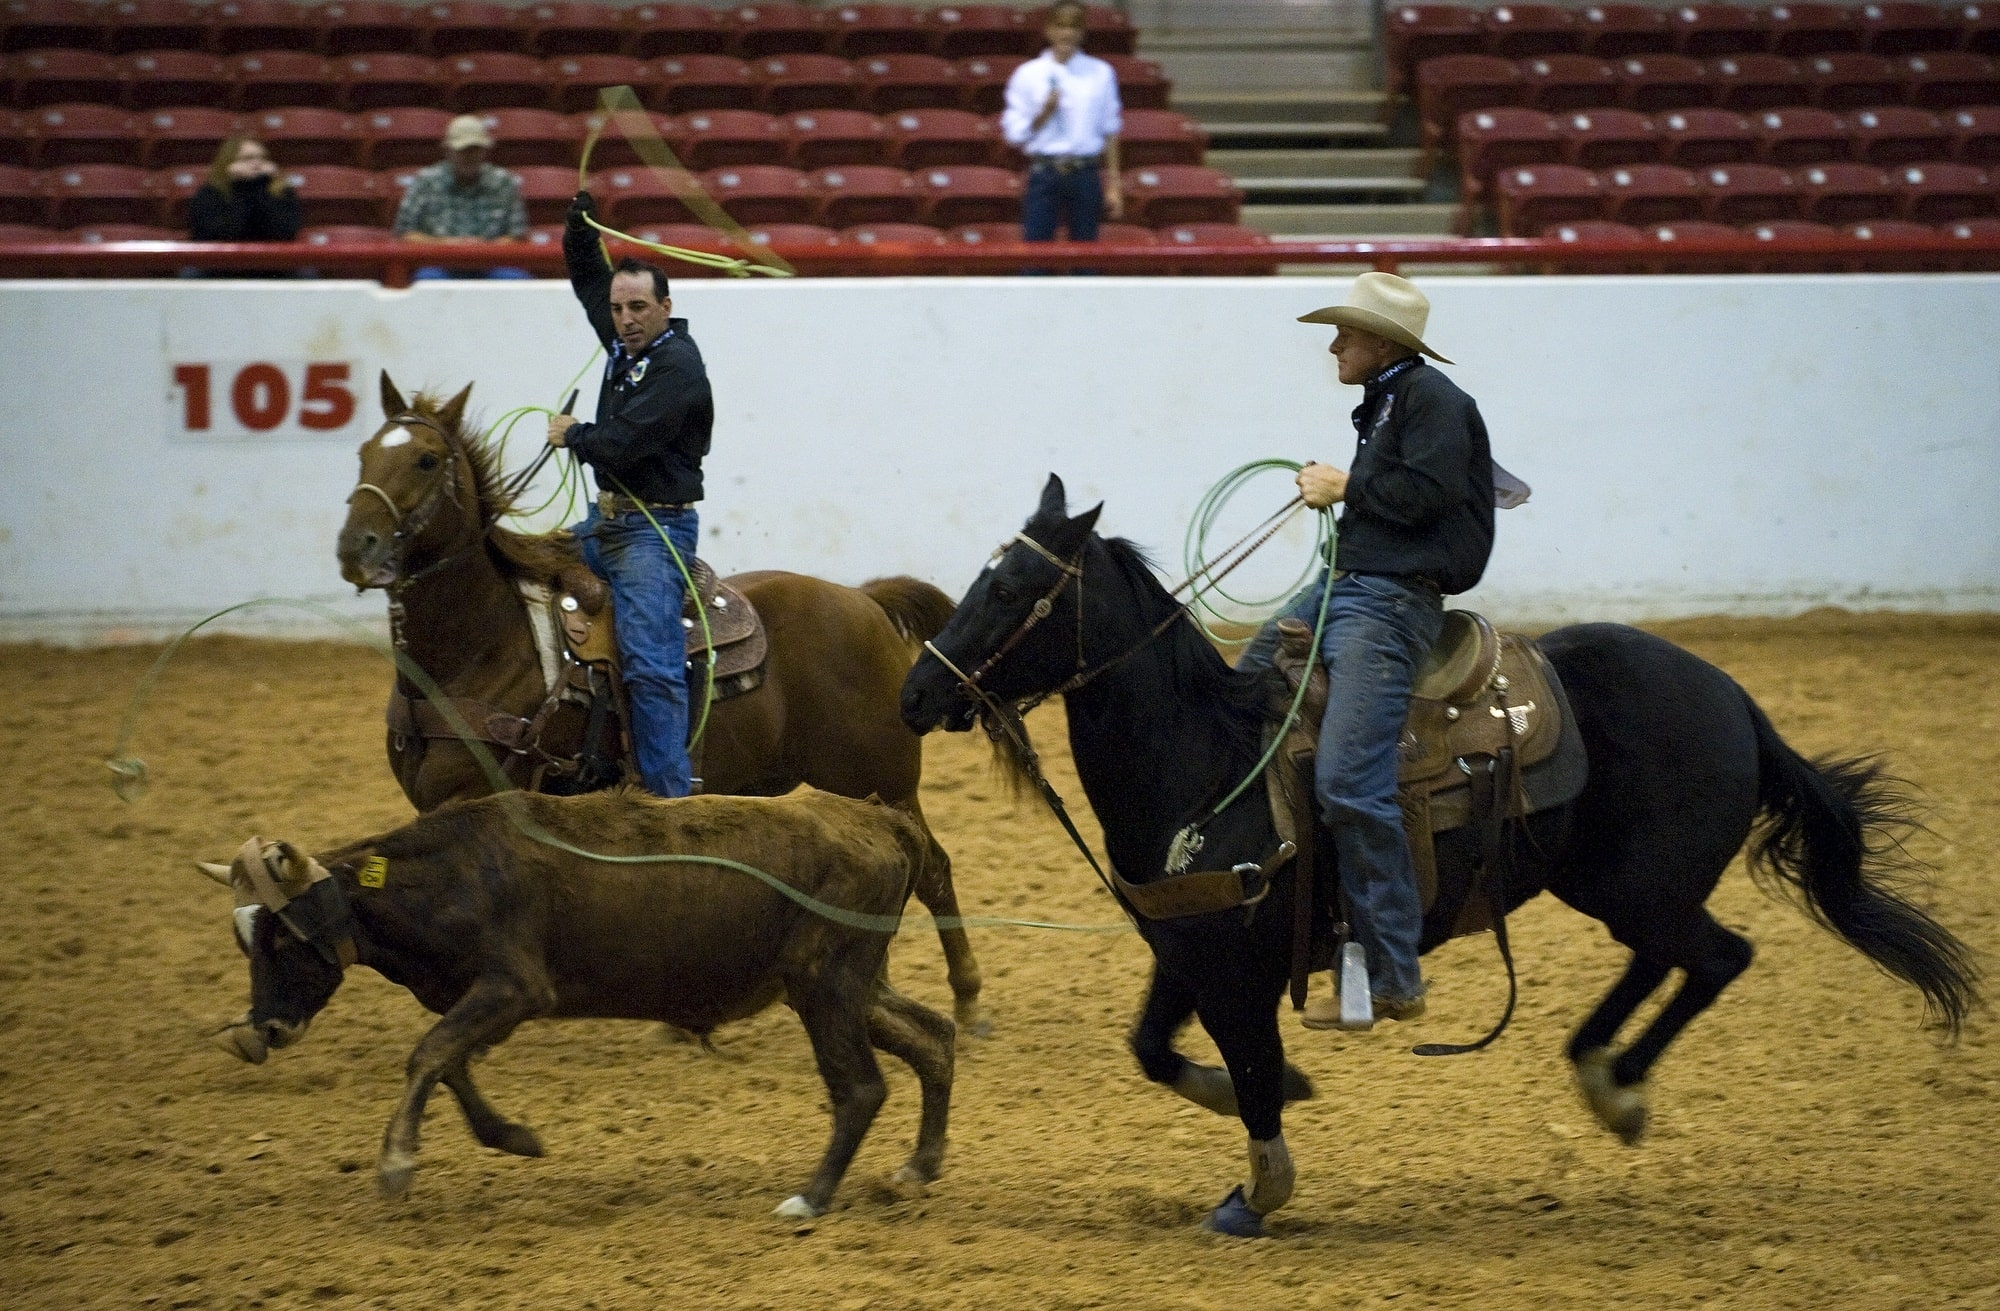

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1.

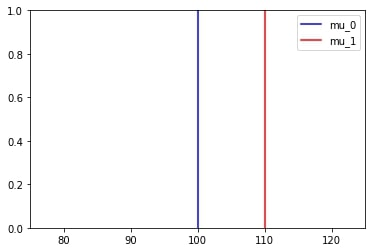

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability.

When we plot the **variability and the mean**, we observe the following plot:

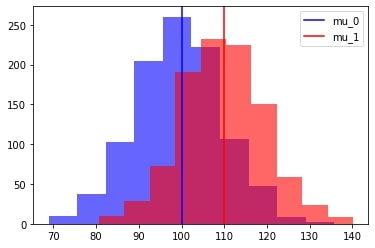

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0.

Now suppose we observe the following plot:

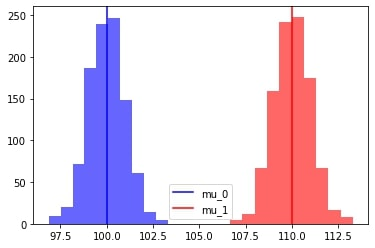

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [1]:
# Download the data located at the following URLs
cfb16_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv"
cfb17_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv"
cfb18_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv"
cfb19_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv"
cfb20_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv"

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [2]:
# Write your code to read in the files and add the year values from each csv:
import pandas as pd

cfb16_df = pd.read_csv(cfb16_url)
cfb16_df['Year'] = 2016

cfb17_df = pd.read_csv(cfb17_url)
cfb17_df['Year'] = 2017

cfb18_df = pd.read_csv(cfb18_url)
cfb18_df['Year'] = 2018

cfb19_df = pd.read_csv(cfb19_url)
cfb19_df['Year'] = 2019

cfb20_df = pd.read_csv(cfb20_url)
cfb20_df['Year'] = 2020

cfb20_df

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Air Force (Mountain West),6,3,3,73,373,2336,6.26,19,389.3,...,58,3,5,8,5,3,8,0,0.00,2020
1,Akron (MAC),6,1,5,121,360,1687,4.69,12,281.2,...,98,4,2,6,3,6,9,-3,-0.50,2020
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,...,12,10,11,21,7,4,11,10,0.91,2020
3,App State (Sun Belt),12,9,3,26,845,5424,6.42,49,452.0,...,57,3,15,18,6,11,17,1,0.08,2020
4,Arizona (Pac-12),5,0,5,86,373,1847,4.95,10,369.4,...,126,1,2,3,5,7,12,-9,-1.80,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,422.7,...,42,2,10,12,6,3,9,3,0.33,2020
123,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,290.9,...,83,4,5,9,10,2,12,-3,-0.27,2020
124,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,479.7,...,98,1,2,3,4,2,6,-3,-0.50,2020
125,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,358.8,...,98,4,4,8,5,6,11,-3,-0.50,2020


## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [3]:
# Write your code to combine all of the csvs into one dataframe here:

combined_df = pd.concat([cfb16_df, cfb17_df, cfb18_df, cfb19_df, cfb20_df], ignore_index=True)

combined_df

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,114,6,8,14,8,14,22,-8,-0.67,2016
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,17,13,16,29,10,9,19,10,0.67,2016
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,18,1,20,21,5,8,13,8,0.62,2016
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,112,6,8,14,9,12,21,-7,-0.58,2016
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,93,8,9,17,7,14,21,-4,-0.33,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,422.7,...,42,2,10,12,6,3,9,3,0.33,2020
627,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,290.9,...,83,4,5,9,10,2,12,-3,-0.27,2020
628,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,479.7,...,98,1,2,3,4,2,6,-3,-0.50,2020
629,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,358.8,...,98,4,4,8,5,6,11,-3,-0.50,2020


## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example:

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [4]:
# Write your code to parse the conference from the team name:
combined_df['Conference'] = combined_df['Team'].str.extract(r'\((.*?)\)')[0]

combined_df


,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,Conference
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,6,8,14,8,14,22,-8,-0.67,2016,MAC
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,13,16,29,10,9,19,10,0.67,2016,SEC
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,1,20,21,5,8,13,8,0.62,2016,Sun Belt
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,6,8,14,9,12,21,-7,-0.58,2016,Pac-12
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,8,9,17,7,14,21,-4,-0.33,2016,Pac-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,422.7,...,2,10,12,6,3,9,3,0.33,2020,Big 12
627,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,290.9,...,4,5,9,10,2,12,-3,-0.27,2020,C-USA
628,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,479.7,...,1,2,3,4,2,6,-3,-0.50,2020,MAC
629,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,358.8,...,4,4,8,5,6,11,-3,-0.50,2020,Big Ten


## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Off.TDs`.

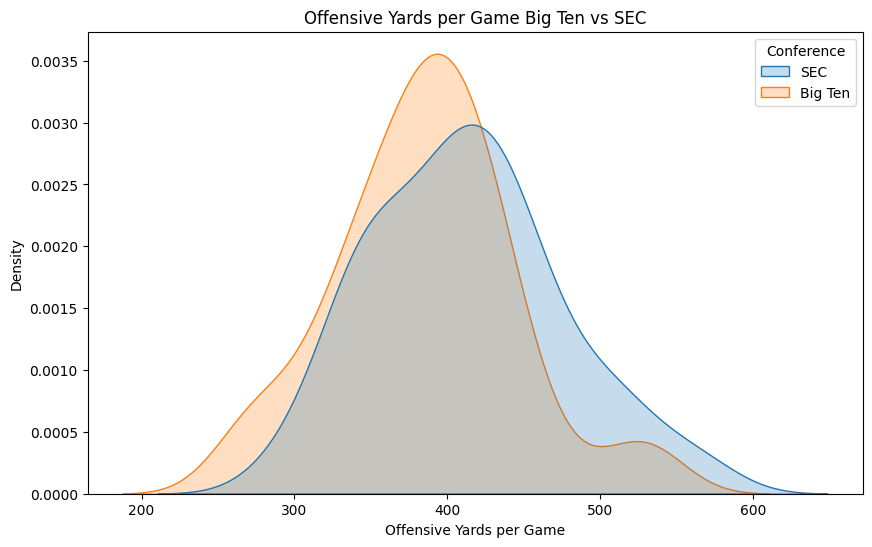

(385.5642857142857, 58.503288736280986, 412.7885714285715, 62.59556761373865)

In [5]:
import seaborn as sns

# Write the code for the statistical differences for Off.Yards.per.Game:

import matplotlib.pyplot as plt #I like matplotlib better, do i have to use seaborn?

big_ten_sec_df = combined_df[combined_df['Conference'].isin(['Big Ten', 'SEC'])]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=big_ten_sec_df, x='Off.Yards.per.Game', hue='Conference', fill=True)
plt.title('Offensive Yards per Game Big Ten vs SEC')
plt.xlabel('Offensive Yards per Game')
plt.ylabel('Density')
plt.show()

big_ten_mean = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Off.Yards.per.Game'].mean()
sec_mean = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Off.Yards.per.Game'].mean()

big_ten_std = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Off.Yards.per.Game'].std()
sec_std = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Off.Yards.per.Game'].std()

big_ten_mean, big_ten_std, sec_mean, sec_std

(Comment on the difference in means and the overlap of distributions here)

The SEC has, on average, more offensive yards per game than the Big Ten, however,
The SEC has a higher standard deviation, meaning that the SEC has a wider range of offensive yards per game than the Big Ten.




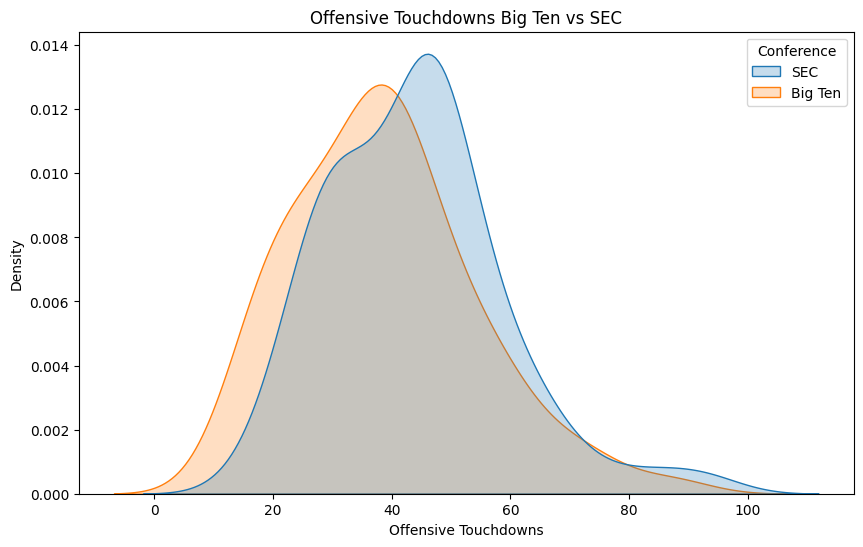

(38.642857142857146, 15.390601041352435, 43.77142857142857, 14.709921160166095)

In [6]:
# Write the code for the statistical differences for Off.TDs:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=big_ten_sec_df, x='Off.TDs', hue='Conference', fill=True)
plt.title('Offensive Touchdowns Big Ten vs SEC')
plt.xlabel('Offensive Touchdowns')
plt.ylabel('Density')
plt.show()

big_ten_mean_tds = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Off.TDs'].mean()
sec_mean_tds = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Off.TDs'].mean()

big_ten_std_tds = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Off.TDs'].std()
sec_std_tds = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Off.TDs'].std()

big_ten_mean_tds, big_ten_std_tds, sec_mean_tds, sec_std_tds

(Comment on the difference in means and the overlap of distributions here)

Again, the SEC has, on average, more touchdowns per game than the BIG Ten
It also looks like the BIG ten has a higher std than the SEC, but I don't see that being significant. The shapes of the distributions are very similiar.

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`.



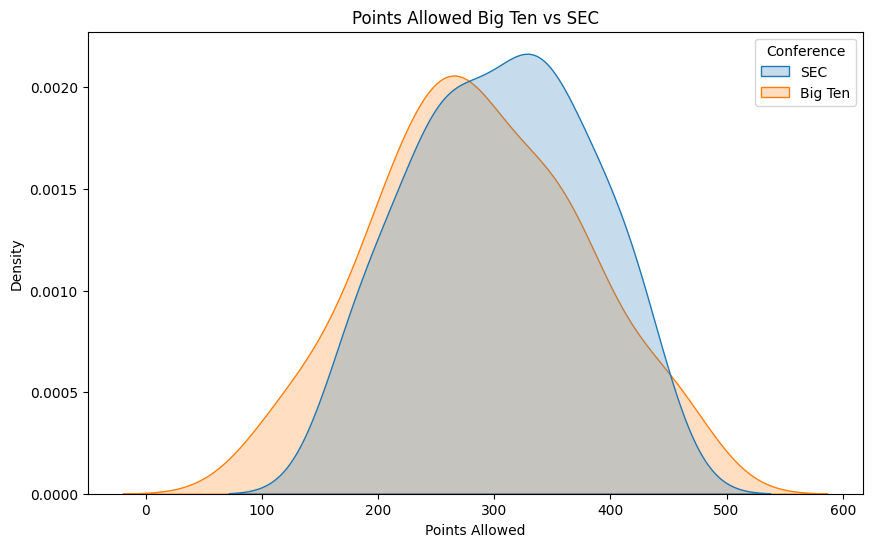

(286.3285714285714, 88.65250863785344, 306.12857142857143, 74.49986313158742)

In [7]:
# Write the code for the statistical differences for Points.Allowed:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=big_ten_sec_df, x='Points.Allowed', hue='Conference', fill=True)
plt.title('Points Allowed Big Ten vs SEC')
plt.xlabel('Points Allowed')
plt.ylabel('Density')
plt.show()

big_ten_mean_points = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Points.Allowed'].mean()
sec_mean_points = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Points.Allowed'].mean()

big_ten_std_points = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Points.Allowed'].std()
sec_std_points = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Points.Allowed'].std()

big_ten_mean_points, big_ten_std_points, sec_mean_points, sec_std_points

(Comment on the difference in means and the overlap of distributions here)

While the SEC has a higher mean for Points Allowed, both distributions have significant overlap. The standard deviations are also very close.

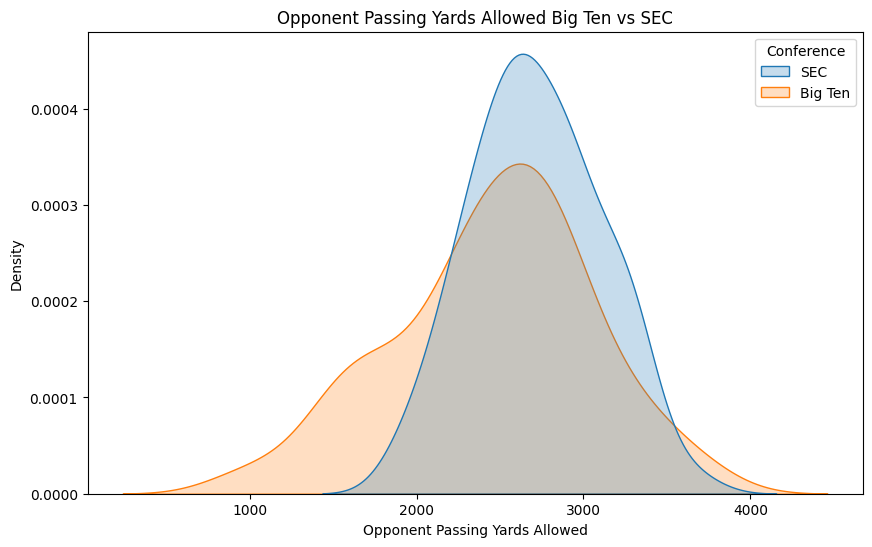

(2454.8571428571427, 592.2984775790353, 2716.3, 385.7759111494501)

In [8]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=big_ten_sec_df, x='Opp.Pass.Yds.Allowed', hue='Conference', fill=True)
plt.title('Opponent Passing Yards Allowed Big Ten vs SEC')
plt.xlabel('Opponent Passing Yards Allowed')
plt.ylabel('Density')
plt.show()

big_ten_mean_pass_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Opp.Pass.Yds.Allowed'].mean()
sec_mean_pass_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Opp.Pass.Yds.Allowed'].mean()

big_ten_std_pass_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Opp.Pass.Yds.Allowed'].std()
sec_std_pass_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Opp.Pass.Yds.Allowed'].std()

big_ten_mean_pass_yards, big_ten_std_pass_yards, sec_mean_pass_yards, sec_std_pass_yards

(Comment on the difference in means and the overlap of distributions here)

The SEC has a much higher mean of Opponent Passing Yards allowed but are much more consistent with their lower standard deviation. The BIG Ten allows less passing yards against them and has a left shift.

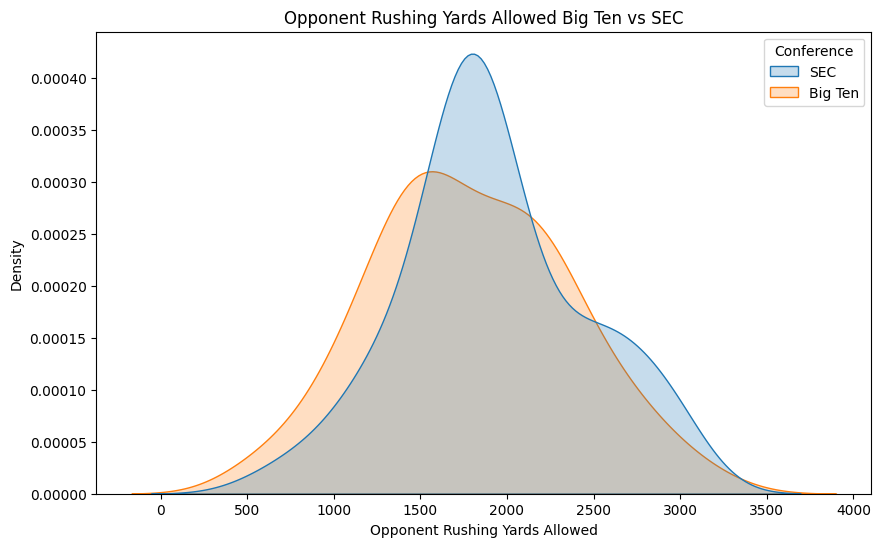

(1794.057142857143, 568.8873168704557, 1920.9714285714285, 529.6095901816944)

In [9]:
# Write the code for the statistical differences for Opp.Rush.Yards.Allowed:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=big_ten_sec_df, x='Opp.Rush.Yards.Allowed', hue='Conference', fill=True)
plt.title('Opponent Rushing Yards Allowed Big Ten vs SEC')
plt.xlabel('Opponent Rushing Yards Allowed')
plt.ylabel('Density')
plt.show()

big_ten_mean_rush_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Opp.Rush.Yards.Allowed'].mean()
sec_mean_rush_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Opp.Rush.Yards.Allowed'].mean()

big_ten_std_rush_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'Big Ten']['Opp.Rush.Yards.Allowed'].std()
sec_std_rush_yards = big_ten_sec_df[big_ten_sec_df['Conference'] == 'SEC']['Opp.Rush.Yards.Allowed'].std()

big_ten_mean_rush_yards, big_ten_std_rush_yards, sec_mean_rush_yards, sec_std_rush_yards

(Comment on the difference in means and the overlap of distributions here)

While the difference in means is just over 100 yards, the SEC has a much more compact distribution pertaining to its average. The SEC is also shifted to the right, meaning that it's likely that SEC teams may actually end with above average rushing yards allowed more often.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

   Year Off.Yards.per.Game               Off.TDs           
                      mean        std       mean        std
0  2016         416.558621  60.311291  45.681034  12.992037
1  2017         402.250388  61.949764  43.310078  13.189602
2  2018         405.440310  58.126804  45.077519  13.431896
3  2019         402.530769  59.017147  44.307692  14.224036
4  2020         399.435433  69.152887  29.314961  13.060118


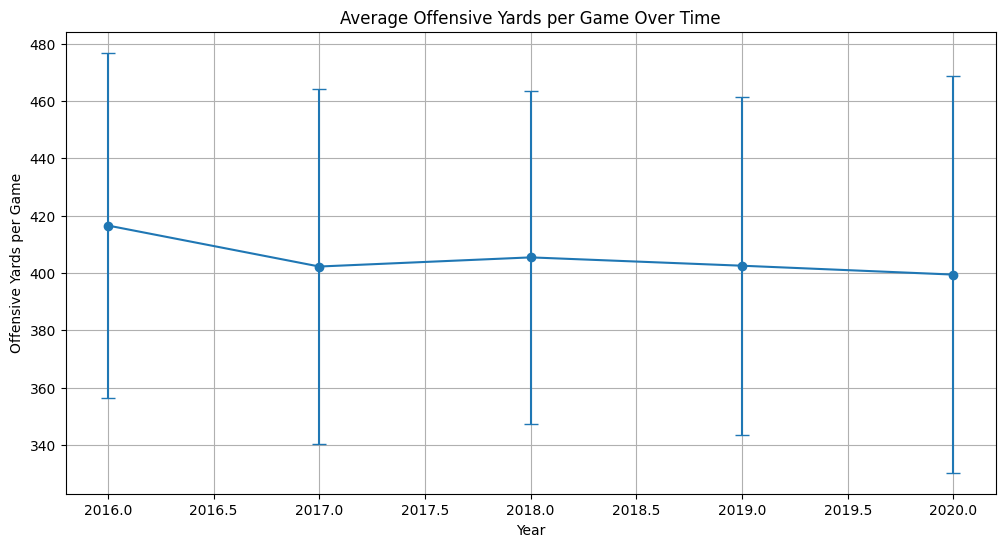

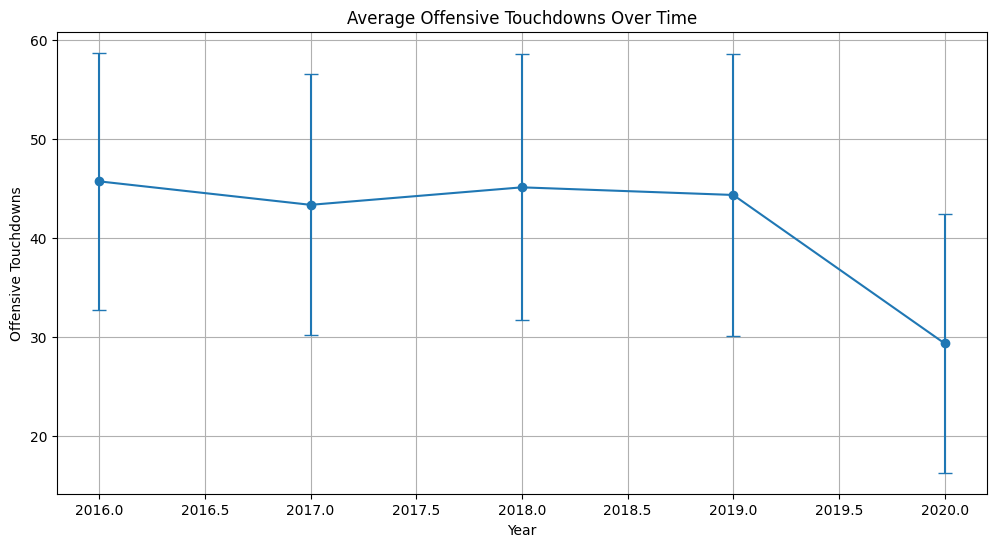

In [10]:
# Create a few plots showing how each metric changed over time:
#mean and standard deviation for Off.Yards.per.Game and Off.TDs for each year
offense_stats = combined_df.groupby('Year').agg({
    'Off.Yards.per.Game': ['mean', 'std'],
    'Off.TDs': ['mean', 'std']
}).reset_index()

print(offense_stats)

#Off.Yards.per.Game over time
plt.figure(figsize=(12, 6))
plt.errorbar(offense_stats['Year'], offense_stats['Off.Yards.per.Game']['mean'],
                yerr=offense_stats['Off.Yards.per.Game']['std'], fmt='-o', capsize=5)
plt.title('Average Offensive Yards per Game Over Time')
plt.xlabel('Year')
plt.ylabel('Offensive Yards per Game')
plt.grid(True)
plt.show()

#Off.TDs over time
plt.figure(figsize=(12, 6))
plt.errorbar(offense_stats['Year'], offense_stats['Off.TDs']['mean'],
                yerr=offense_stats['Off.TDs']['std'], fmt='-o', capsize=5)
plt.title('Average Offensive Touchdowns Over Time')
plt.xlabel('Year')
plt.ylabel('Offensive Touchdowns')
plt.grid(True)
plt.show()

(Comment on any trends you see here)

It's interesting to see how even though the average offensive yards per game stays relatively consistent, we see a decrease in offensive touchdowns from 2019-2020. Meaning, that despite still gaining the same amount of yards on average, they are unable to actually score as much.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

   Year Points.Allowed            Opp.Pass.Yds.Allowed              \
                  mean        std                 mean         std   
0  2016     354.818966  76.005217          2941.612069  469.792605   
1  2017     343.976744  79.907707          2845.961240  448.807820   
2  2018     349.387597  82.311936          2856.658915  443.457571   
3  2019     344.384615  76.350719          2917.038462  388.231698   
4  2020     237.055118  86.315893          1948.937008  660.804653   

  Opp.Rush.Yards.Allowed              
                    mean         std  
0            2186.801724  500.023099  
1            2125.868217  489.201173  
2            2143.255814  537.054107  
3            2048.492308  476.154350  
4            1379.511811  482.023296  


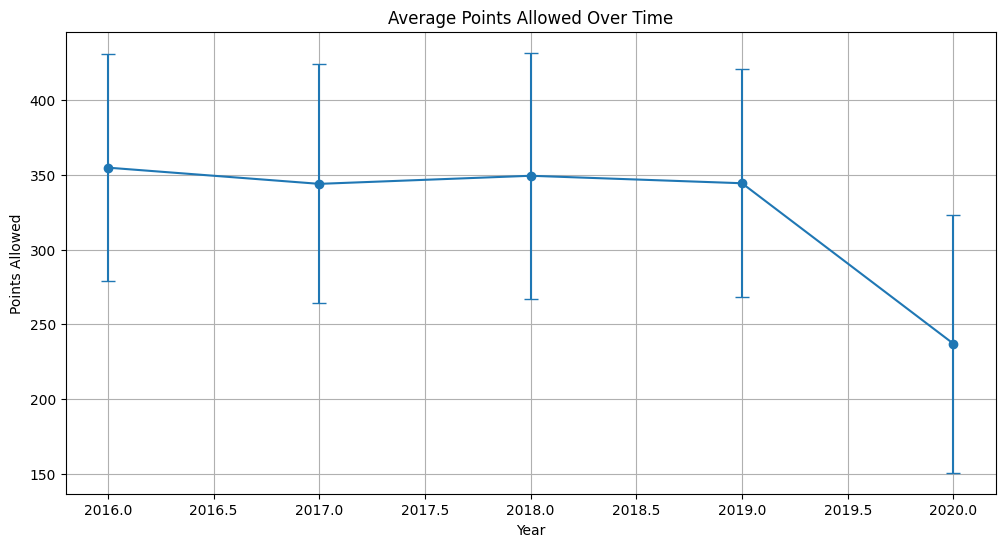

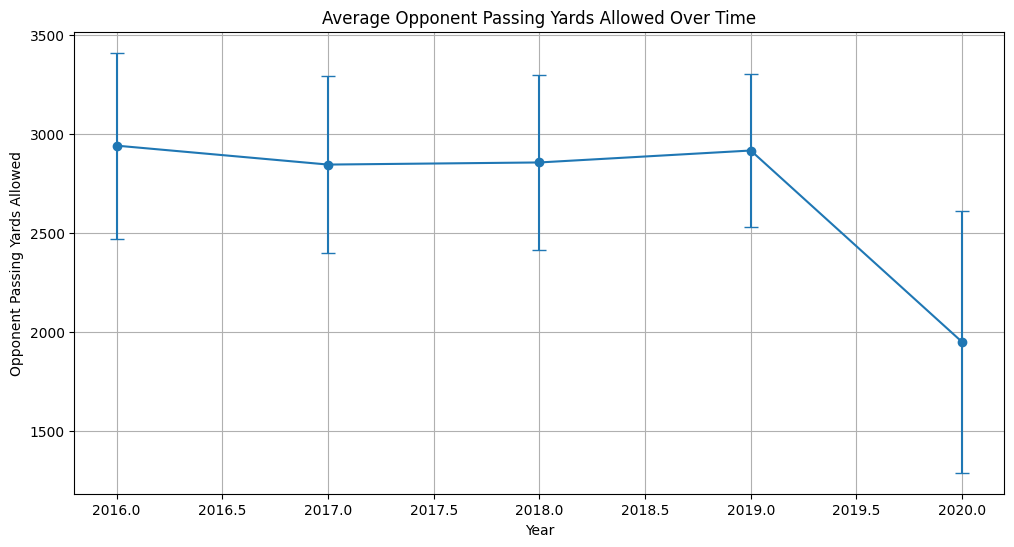

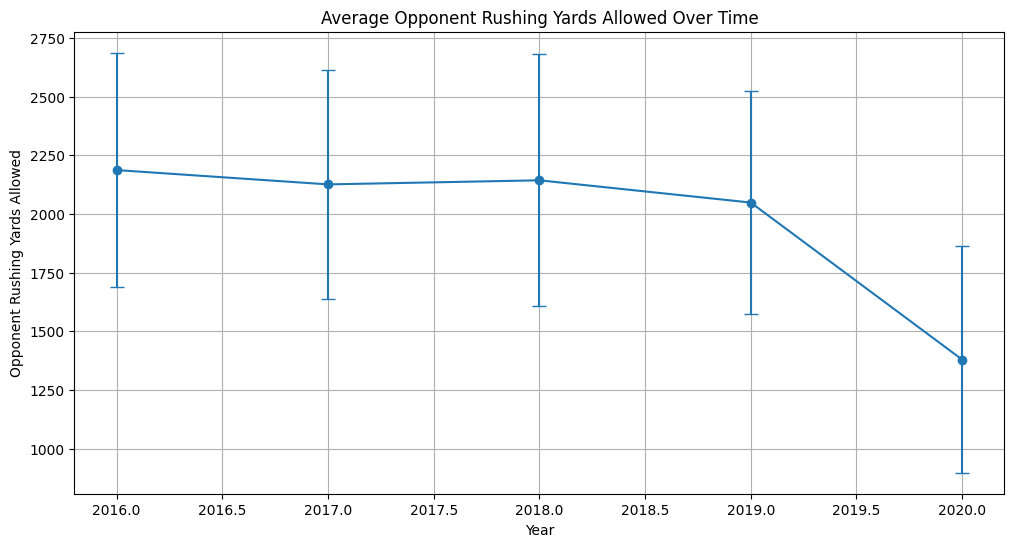

In [11]:
# Create a few plots showing how each metric changed over time:
#mean and standard deviation for Points.Allowed, Opp.Pass.Yds.Allowed, and Opp.Rush.Yards.Allowed for each year
defense_stats = combined_df.groupby('Year').agg({
    'Points.Allowed': ['mean', 'std'],
    'Opp.Pass.Yds.Allowed': ['mean', 'std'],
    'Opp.Rush.Yards.Allowed': ['mean', 'std']
}).reset_index()

print(defense_stats)

#Points.Allowed over time
plt.figure(figsize=(12, 6))
plt.errorbar(defense_stats['Year'], defense_stats['Points.Allowed']['mean'],
                yerr=defense_stats['Points.Allowed']['std'], fmt='-o', capsize=5)
plt.title('Average Points Allowed Over Time')
plt.xlabel('Year')
plt.ylabel('Points Allowed')
plt.grid(True)
plt.show()

#Opp.Pass.Yds.Allowed over time
plt.figure(figsize=(12, 6))
plt.errorbar(defense_stats['Year'], defense_stats['Opp.Pass.Yds.Allowed']['mean'],
                yerr=defense_stats['Opp.Pass.Yds.Allowed']['std'], fmt='-o', capsize=5)
plt.title('Average Opponent Passing Yards Allowed Over Time')
plt.xlabel('Year')
plt.ylabel('Opponent Passing Yards Allowed')
plt.grid(True)
plt.show()

#Opp.Rush.Yards.Allowed over time
plt.figure(figsize=(12, 6))
plt.errorbar(defense_stats['Year'], defense_stats['Opp.Rush.Yards.Allowed']['mean'],
                yerr=defense_stats['Opp.Rush.Yards.Allowed']['std'], fmt='-o', capsize=5)
plt.title('Average Opponent Rushing Yards Allowed Over Time')
plt.xlabel('Year')
plt.ylabel('Opponent Rushing Yards Allowed')
plt.grid(True)
plt.show()

(Comment on any trends you see here)

Almost all metrics stay pretty consistent from 2016-2019. Then, all metrics decline fairly sharply from 2019-2020.